<a href="https://colab.research.google.com/github/adnanakhter11/Fake-News-Detection-from-Text-using-Neural-Network/blob/main/Fake_News_Detection_using_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Fake News Detection from Text using Neural Network



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import regex as re 
import nltk
import string
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop = stopwords.words('english')
lem = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Aqsa/aaaa.rar (Unzipped Files)/aqsafake.csv' )

In [ ]:
df.head()

,Title,TEXT,Subject,Date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,31-Dec-17
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,31-Dec-17
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,30-Dec-17
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,29-Dec-17
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,25-Dec-17


In [ ]:
df['Label']=0

In [ ]:
df.head()

,Title,TEXT,Subject,Date,Label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,31-Dec-17,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,31-Dec-17,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,30-Dec-17,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,29-Dec-17,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,25-Dec-17,0


In [ ]:
df1=pd.read_csv('/content/drive/MyDrive/Aqsa/aaaa.rar (Unzipped Files)/aqsatrue.csv')

In [ ]:
df1.head()

,Title,TEXT,Subject,Date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,31-Dec-17
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,29-Dec-17
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,31-Dec-17
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,30-Dec-17
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,29-Dec-17


In [ ]:
df1['Label']=1

In [ ]:
df1.head()

,Title,TEXT,Subject,Date,Label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,31-Dec-17,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,29-Dec-17,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,31-Dec-17,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,30-Dec-17,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,29-Dec-17,1


In [ ]:
aq=pd.concat([df,df1],axis=0)

In [ ]:
aq.tail()

,Title,TEXT,Subject,Date,Label
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,22-Aug-17,1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,22-Aug-17,1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,22-Aug-17,1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,22-Aug-17,1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,22-Aug-17,1


In [ ]:
aq.shape

(31149, 5)

In [ ]:
aq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31149 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Title    31149 non-null  object
 1   TEXT     31149 non-null  object
 2   Subject  31148 non-null  object
 3   Date     31148 non-null  object
 4   Label    31149 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
len(aq)

31149

In [ ]:
aq.describe()

,Label
count,31149.000000
mean,0.687566
std,0.463493
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [ ]:
aq.isnull().sum()

Title      0
TEXT       0
Subject    1
Date       1
Label      0
dtype: int64

In [ ]:
aq.columns

Index(['Title', 'TEXT', 'Subject', 'Date', 'Label'], dtype='object')

In [ ]:
aqsa=aq[['TEXT','Label']]
aqsa.head()

,TEXT,Label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [ ]:
aqsa['Label'].value_counts()

1    21417
0     9732
Name: Label, dtype: int64

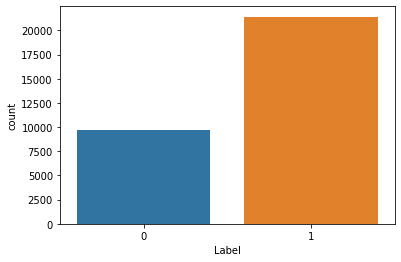

In [ ]:
sns.countplot(x='Label', data=aqsa)

In [ ]:
# This function converts a text to a sequence of words:
def tokens(words):
    # Removing the @
    words = re.sub(r"@[A-Za-z0-9]+", ' ', words)
    # Removing the URL links
    words = re.sub(r"https?://[A-Za-z0-9./]+", ' ', words)
    # Keeping only letters
    words = re.sub(r"[^a-zA-Z.!?']", ' ', words)
    # Removing additional whitespaces
    words = re.sub(r" +", ' ', words)
    # Remove URL
    words = re.sub(r'https*\S+', ' ', words)
    # Remove mentions like @adnanakhter123
    words = re.sub(r"@\S+", ' ', words)
    # Remove Hashtags like #adnanakhter
    words = re.sub(r"#\S+", ' ', words)
    # Remove ticks and the next character like People's, father's
    words = re.sub(r"\'\w+", '', words)
    # Remove punctuations like "",''
    words = re.sub(r"[%s]" % re.escape(string.punctuation), ' ', words)
    # Remove numbers like A-120 or c-130
    words = re.sub(r"\w*\d+\w*", '', words)
    # Replace the over spaces like "    my    name is   adnan akhter"
    words = re.sub(r"\s{2,}", ' ', words)
    # lowercasing and splitting or tokenizing the words like adnan,akhter,home,etc.
    text = words.lower().split()
    return " ".join(text)

In [ ]:
aqsa['TEXT']=aqsa['TEXT'].apply(tokens)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
aqsa.tail(100)

,TEXT,Label
21317,riyadh reuters a saudi led arab coalition on s...,1
21318,milan reuters italian interior minister marco ...,1
21319,sanaa reuters her bruised eyes still swollen s...,1
21320,reuters a man who assaulted police officers wi...,1
21321,beijing reuters not enough effort is being put...,1
...,...,...
21412,brussels reuters nato allies on tuesday welcom...,1
21413,london reuters lexisnexis a provider of legal ...,1
21414,minsk reuters in the shadow of disused soviet ...,1
21415,moscow reuters vatican secretary of state card...,1


In [ ]:
def remove_stopwords(text):
    """The function to removing stopwords"""
    text = [word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(text)

In [ ]:
aqsa["TEXT"] = aqsa["TEXT"].apply(remove_stopwords)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
aqsa.head()

,TEXT,Label
0,donald trump wish americans happy new year lea...,0
1,house intelligence committee chairman devin nu...,0
2,friday revealed former milwaukee sheriff david...,0
3,christmas day donald trump announced would bac...,0
4,pope francis used annual christmas day message...,0


In [ ]:
def word_lem(text):
    lem_text = [lem.lemmatize(word) for word in text.split()]
    return " ".join(lem_text)

In [ ]:
aqsa["TEXT"] = aqsa["TEXT"].apply(word_lem)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
aqsa.head()

,TEXT,Label
0,donald trump wish american happy new year leav...,0
1,house intelligence committee chairman devin nu...,0
2,friday revealed former milwaukee sheriff david...,0
3,christmas day donald trump announced would bac...,0
4,pope francis used annual christmas day message...,0


In [ ]:
X=aqsa["TEXT"]
y=aqsa["Label"]

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
train_X

18200    budapest reuters hungarian prime minister vikt...
1527     washington reuters u department homeland secur...
4688     miracle mattress san antonio want everyone kno...
7051     washington reuters u house representative spea...
5888     washington reuters president donald trump satu...
                               ...                        
5695     pastor steven anderson faithful word baptist c...
8006     one antonin scalia last ruling supreme court m...
8013     beijing tokyo reuters hillary clinton put dona...
8199     washington reuters u state department spokesma...
3419     washington reuters robert mueller special coun...
Name: TEXT, Length: 24919, dtype: object

In [ ]:
test_X

7848     light flint water crisis michigan republican p...
924      donald trump first trip overseas absolute disa...
1429     former mexican president vicente fox never fan...
10782    new york reuters puerto rico subject two u hou...
1768     following statement posted verified twitter ac...
                               ...                        
4585     case anybody wondering dangerous trump love pu...
9730     boston reuters brady campaign prevent gun viol...
5244     donald trump received massive backlash comment...
8760     may say senator ted cruz r tx born american ci...
509      donald trump ongoing effort spur civil war hol...
Name: TEXT, Length: 6230, dtype: object

In [ ]:
train_y

18200    1
1527     1
4688     0
7051     1
5888     1
        ..
5695     0
8006     0
8013     1
8199     1
3419     1
Name: Label, Length: 24919, dtype: int64

In [ ]:
test_y

7848     0
924      0
1429     0
10782    1
1768     1
        ..
4585     0
9730     1
5244     0
8760     0
509      0
Name: Label, Length: 6230, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer()
vectorizer.fit(train_X)
print(vectorizer.vocabulary_)

{'budapest': 8468, 'reuters': 54031, 'hungarian': 29140, 'prime': 50114, 'minister': 40880, 'viktor': 68968, 'orban': 45839, 'said': 55753, 'europe': 20347, 'must': 42531, 'focus': 22703, 'preserving': 49950, 'free': 23259, 'movement': 42022, 'eu': 20288, 'citizen': 11258, 'leader': 36041, 'make': 38333, 'plan': 48777, 'overhaul': 46401, 'bloc': 6972, 'fierce': 22029, 'critic': 13885, 'perceived': 47813, 'bureaucratic': 8679, 'reach': 52264, 'european': 20348, 'union': 67396, 'proposal': 50461, 'tighten': 64461, 'labor': 35367, 'rule': 55348, 'internal': 31130, 'border': 7491, 'control': 13027, 'jeopardize': 32357, 'significant': 58709, 'achievement': 531, 'project': 50349, 'grand': 25587, 'future': 23718, 'schengen': 56602, 'system': 62820, 'within': 70972, 'crumbling': 14021, 'away': 4398, 'hand': 26816, 'told': 64835, 'state': 60984, 'radio': 51690, 'restrict': 53871, 'washington': 69848, 'department': 15778, 'homeland': 28539, 'security': 57151, 'wednesday': 70136, 'considering': 1

In [ ]:
vector_train = vectorizer.transform(train_X)
vector_test = vectorizer.transform(test_X)

In [ ]:
print(vector_train.shape)


(24919, 73158)


In [ ]:
from sklearn.neural_network import MLPClassifier
nn= MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='sgd', alpha=0.0001,
                  batch_size='auto', learning_rate='constant', learning_rate_init=0.001,
                  power_t=0.5, max_iter=10, shuffle=True, random_state=None, tol=0.0001,
                  verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                  early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999,
                  epsilon=1e-08, n_iter_no_change=10, max_fun=15000)

In [ ]:
from sklearn.exceptions import ConvergenceWarning
ann= nn.fit(vector_train, train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
pre=ann.predict(vector_test)
print(pre)

[1 1 1 ... 1 1 1]


In [ ]:
score=ann.score(vector_test, test_y)
print(score)

0.6908507223113964


In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy Score is: ", accuracy_score(test_y, pre)*100)

Accuracy Score is:  69.08507223113965
